In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

彻底理解正态分布——强大的数学分析工具
https://www.toutiao.com/a6819809497314230796/?tt_from=mobile_qq&utm_campaign=client_share&timestamp=1592164653&app=news_article_social&utm_source=mobile_qq&utm_medium=toutiao_ios&use_new_style=0&req_id=2020061503573301001404008904E61777&group_id=6819809497314230796

## https://www.cnblogs.com/lingjiajun/p/10146252.html
参数1是均值，2是标准差，3是数量
<img src="/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/im/9EDDE10F-C789-4C4C-8EEF-45EFA42A09F9.png" >
## $ \mu:均值 \sigma:标准差 $

numpy正太分布函数

In [3]:
normal = np.sort(np.random.normal(0,1,10000))

## 正太分布函数 mean=0，sigma=1时是标准正太分布

## 正太分布的概率密度

In [4]:
def normal_distribution1(mu=0,sigma=1,space=1000):
    x =  np.linspace(mu-(3*sigma-(-3*sigma)),mu+(3*sigma-(-3*sigma)),space)
    return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-1*((x-mu)**2)/(2*(sigma**2)))

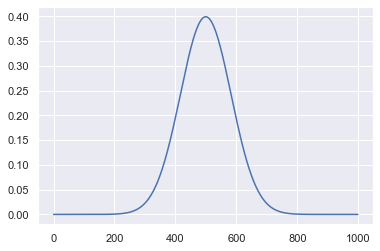

In [5]:
plt.plot(normal_distribution1())

## 下面的是 常用描述正太分布密度写法，并无太大区别

In [6]:
import math
def normal_distribution2(mean=0,sigma=1,space=1000):
    x = np.linspace(mean-(3*sigma-(-3*sigma)),mean+(3*sigma-(-3*sigma)),space)
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

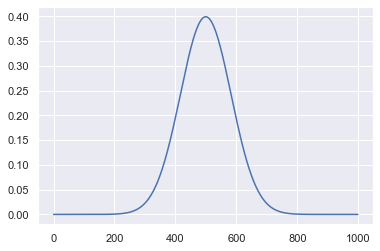

In [7]:
plt.plot(normal_distribution2(0,1))

## 3σ准则又称为拉依达bai准则，它是先假设一组du检测数据只含zhi有随机误差，dao对其进行计算处理得到标准偏差，按一定概率确定一个区间，认为凡超过这个区间的误差，就不属于随机误差而是粗大误差，含有该误差的数据应予以剔除。且3σ适用于有较多组数据的时候。
# 3σ原则为

## 数值分布在（μ-σ,μ+σ)中的概率为0.6827

## 数值分布在（μ-2σ,μ+2σ)中的概率为0.9545

## 数值分布在（μ-3σ,μ+3σ)中的概率为0.9973

## 可以认为，Y 的取值几乎全部集中在（μ-3σ,μ+3σ)区间内，超出这个范围的可能性仅占不到0.3%.

In [8]:
def three_sigm_criteria(normalx):
    mu = normalx.mean()
    std = normalx.std()
    test_normal_stmp = lambda n : normalx[(normalx>(mu-n*std))==(normalx<(mu+n*std))].shape[0]/normalx.shape[0]
    calculate = {"{}{}{}".format("±",str(i),"Sigma"):(test_normal_stmp(i),test_normal_stmp(i)>j) for i,j in zip(range(1,4),(0.6526,0.9544,0.9974))}
    return calculate


In [9]:
three_sigm_criteria(normal)

{'±1Sigma': (0.6851, True),
 '±2Sigma': (0.9555, True),
 '±3Sigma': (0.9977, True)}

# 高斯过程


In [10]:
x = np.linspace(-1,1,100)
y = np.power(x,2)+0.2*np.random.rand(x.size)

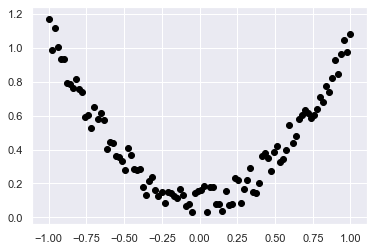

In [11]:
plt.scatter(x,y,c='black')

# 有参数拟合方法（多项式回归）
## $$ y=\theta_{0} + \theta_{1}X_{1} $$
## $$ y=\theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}^{2} $$

平均绝对值误差： 0.04696502380702539
平均平方误差： 0.002852970163790528
中位绝对值误差： 0.04723934834632019
R2得分： 0.9689906752510639


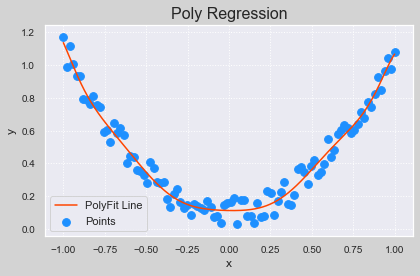

In [12]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm

# 采集数据
#x, y = np.loadtxt('./ml_data/single.txt', delimiter=',', usecols=(0, 1), unpack=True)
# 把输入变为二维数组，一行一样本，一列一特征
x = x.reshape(-1, 1)

# 创建模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(10),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(x, y)
# 求预测值y
pred_y = model.predict(x)

# 模型评估
print('平均绝对值误差：', sm.mean_absolute_error(y, pred_y))
print('平均平方误差：', sm.mean_squared_error(y, pred_y))
print('中位绝对值误差：', sm.median_absolute_error(y, pred_y))
print('R2得分：', sm.r2_score(y, pred_y))

# 绘制多项式回归线
px = np.linspace(x.min(), x.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("Poly Regression", facecolor='lightgray')
mp.title('Poly Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(x, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()

In [13]:
n = 50
X_test = np.linspace(-5,5,n).reshape(-1,1)

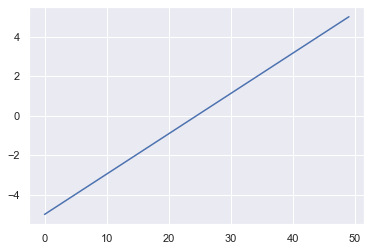

In [14]:
plt.plot(X_test)

# 核函数

In [15]:
def kernel(a,b,param):
    sq_dist = np.sum(a**2,1).reshape(-1,1)+np.sum(b**2,1) - 2*np.dot(a,b.T)
    return np.exp(-0.5*(1/param)*sq_dist)
param = 0.1
K_ss = kernel(X_test,X_test,param)

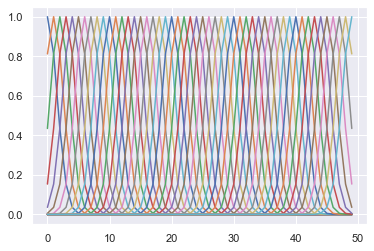

In [34]:
plt.plot(K_ss)

([<matplotlib.lines.Line2D at 0x12fa2d210>], (50, 1))

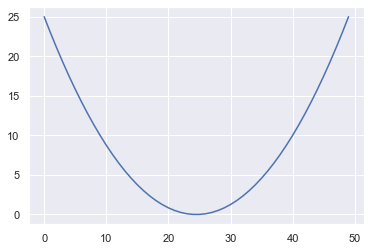

In [17]:
left = np.sum(X_test**2,1).reshape(-1,1)
plt.plot(left),left.shape

In [19]:
L = np.linalg.cholesky(K_ss+1e-15*np.eye(n))
f_prior = np.dot(L,np.random.normal(size=(n,3)))

Text(0.5, 1.0, 'three samples form the GP proior')

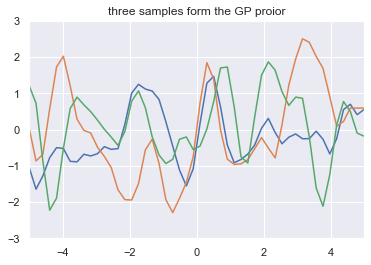

In [20]:
plt.plot(X_test,f_prior)
plt.axis([-5,5,-3,3])
plt.title("three samples form the GP proior")

In [21]:
x_train = np.array([-4,-3,-2,-1,1]).reshape(5,1)
y_train = np.sin(x_train)

In [22]:
K = kernel(x_train,x_train,param)
L = np.linalg.cholesky(K + 0.00005 * np.eye(len(x_train)))

array([[1.00005000e+00, 6.73794700e-03, 2.06115362e-09, 2.86251858e-20,
        5.16642063e-55],
       [6.73794700e-03, 1.00005000e+00, 6.73794700e-03, 2.06115362e-09,
        1.80485139e-35],
       [2.06115362e-09, 6.73794700e-03, 1.00005000e+00, 6.73794700e-03,
        2.86251858e-20],
       [2.86251858e-20, 2.06115362e-09, 6.73794700e-03, 1.00005000e+00,
        2.06115362e-09],
       [5.16642063e-55, 1.80485139e-35, 2.86251858e-20, 2.06115362e-09,
        1.00005000e+00]])

In [23]:
K_s = kernel(x_train,X_test,param)
LK = np.linalg.solve(L,K_s)
mu = np.dot(LK.T , np.linalg.solve(L,y_train)).reshape((n,))

In [24]:
LK.shape

(5, 50)

# np.diag(array) 中
## array是一个1维数组时，结果形成一个以一维数组为对角线元素的矩阵
## array是一个二维矩阵时，结果输出矩阵的对角线元素

In [25]:
s2 = np.diag(K_ss)- np.sum(LK**2,axis=0)
std_v = np.sqrt(s2) 

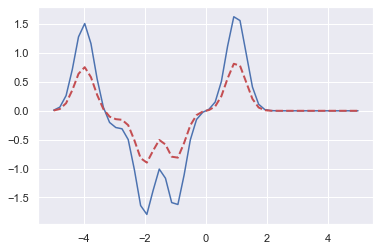

In [26]:
plt.plot(X_test,mu-2*std_v+mu+2*std_v)
plt.plot(X_test,mu,'r--',lw=2)

No handles with labels found to put in legend.


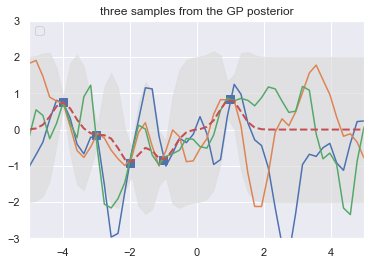

In [27]:
L = np.linalg.cholesky(K_ss+1e-6*np.eye(n)-np.dot(LK.T,LK))
f_post = mu.reshape(-1,1)+np.dot(L,np.random.normal(size=(n,3)))

plt.plot(x_train,y_train,'bs',ms=8)
plt.plot(X_test,f_post) # 原函数的线
plt.gca().fill_between(X_test.flat,mu-2*std_v,mu+2*std_v,color="#dddddd",alpha=0.7)  # plt.gca() 轴的编辑器 #spines表示四周的线,fill_between() 填充两条线间区域
plt.plot(X_test,mu,'r--',lw=2)
plt.axis([-5,5,-3,3])  # 编辑轴上数字，坐标轴的数字显示在横轴下面和纵轴左面
plt.title("three samples from the GP posterior")
plt.legend(loc="upper left") # 图例说明，loc指定位置
plt.grid(True) # 网格
plt.show()